YOUR FIRST PERCEPTRON

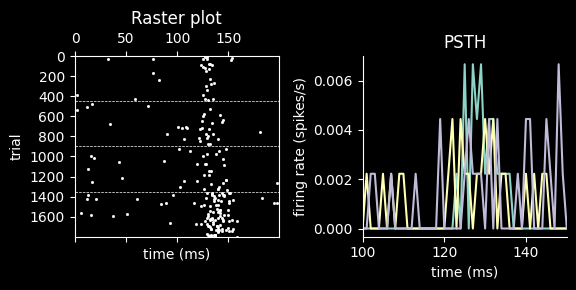

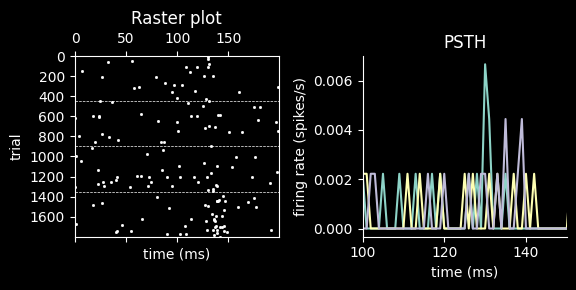

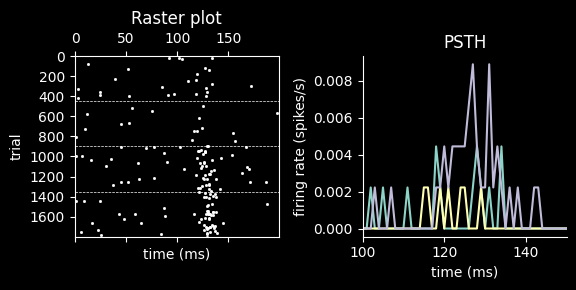

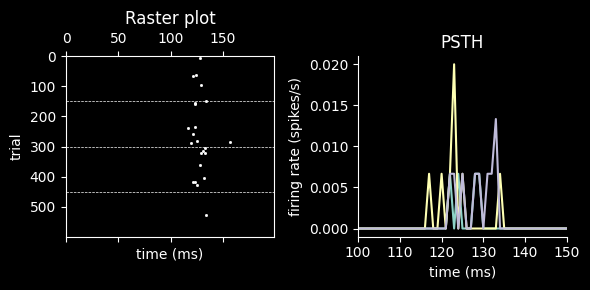

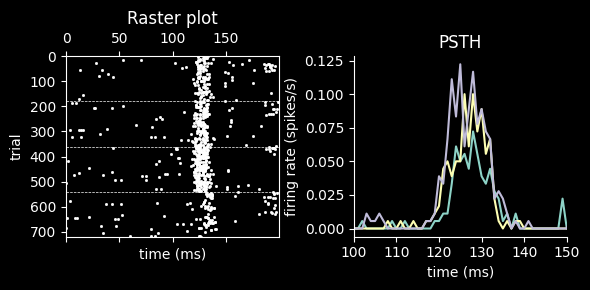

In [ ]:


import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import warnings
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
# pathroot = '/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Projet_SPIKE_Cluster_GBJNC/Script_pour_figures'
plt.style.use('dark_background')


# here DEFINE THE PATH TO YOUR DATA
pathroot = '/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA/Projets/EMN_MLP_NC/'
# pathroot = 'D:/DATA/Projet_SPIKE_Cluster_GBJNC/Script_pour_figures/'

pathdata = pathroot + '/data'
pathout= pathroot + '/out'

# open the data
Neuronpop=np.load(pathdata + f'/Neuronpop_0.npz', allow_pickle=True)


for neuron in range(5):

    sua=Neuronpop[f'arr_{neuron}']
    stim=sua[:,0]
    sua=sua[:,1:]
    fig, ax = plt.subplots(1,2,figsize=(6,3))


    ax[0].spy(sua[:,0:200], markersize=1,aspect='auto')
    for cond in range(2,6):
        ax[0].axhline(np.min(np.where(stim==cond)[0]), color='w', ls='--', lw=0.5)
    ax[0].set_title('Raster plot')
    ax[0].set_xlabel('time (ms)')
    ax[0].set_ylabel('trial')
    for cond in range(2,5):
        ax[1].plot(np.mean(sua[stim==cond,:], axis=0) )
    ax[1].set_title('PSTH')
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('firing rate (spikes/s)')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].set_xlim([100, 150])
    plt.tight_layout()
    plt.show()


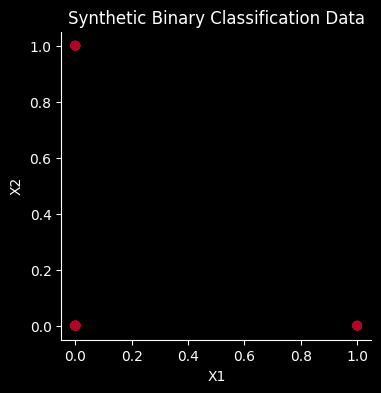

In [ ]:


mintrial=100
onset=100
offset=150
Unitpop=[]

for neuron in range(len(Neuronpop)):
    sua=Neuronpop[f'arr_{neuron}'] # get data for one neuron
    Unit2r=random.sample(sua[sua[:,0]==2].tolist(), mintrial) # random sample 100 trials for condition 2
    Unit3r=random.sample(sua[sua[:,0]==3].tolist(), mintrial) # random sample 100 trials for condition 3
    Unit4r=random.sample(sua[sua[:,0]==4].tolist(), mintrial) # random sample 100 trials for condition 4
    Unit5r=random.sample(sua[sua[:,0]==5].tolist(), mintrial) # random sample 100 trials for condition 5

    Unit=np.concatenate((Unit2r,Unit3r,Unit4r,Unit5r), axis=0) # concatenate all trials

    UnitTime=np.sum(Unit[:,onset:offset], axis=1) # sum spikes in the time window
    UnitTime[UnitTime>0]=1 # binarize
    
    Unitpop.append(UnitTime) # add neuron to population matrix

StimTarget=Unit[:,0] # get stimulus labels
StimTarget=np.reshape(StimTarget, (400,1))# reshape to have one column
Unitpop=np.transpose(Unitpop) # transpose to have trials in rows and neurons in columns


X=Unitpop[:200,:]  # take only 200 first trials for the 2 first condition
y=StimTarget[:200]-2 # make labels 0 and 1

y = y.reshape((y.shape[0], 1))


fig, ax = plt.figure(figsize=(4, 4)), plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Synthetic Binary Classification Data")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim([-6,9])
# ax.set_ylim([-12,-2])
plt.show()


0.99


(50000, 1)

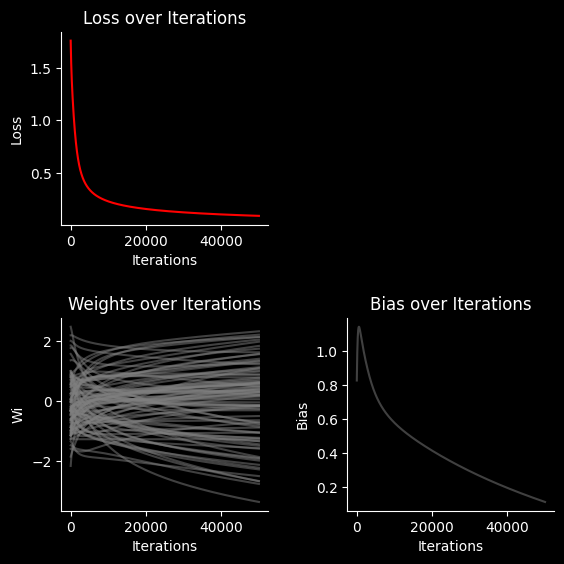

In [167]:
# random definition of W and b for initialisation
# of the first iteration

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
# model and definition of the activation function

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A


# log loss function

def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

# gradients of the loss function with respect to W and b

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

# update of W and b with gradient descent

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

# predict function to classify new data points

def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate = 0.01, n_iter =50000):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []
    Wall=[]
    ball=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        Wall.append(W)
        ball.append(b)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    fig, ax = plt.subplots(2,2,figsize=(6,6))
    ax[0,0].plot(Loss, color='red')
    ax[0,0].set_xlabel("Iterations")
    ax[0,0].set_ylabel("Loss")
    ax[0,0].set_title("Loss over Iterations")
    ax[0,0].spines['top'].set_visible(False)
    ax[0,0].spines['right'].set_visible(False)

    ax[1,0].plot(np.array(Wall)[:,:,0],'gray', alpha=0.5)
    ax[1,0].set_xlabel("Iterations")
    ax[1,0].set_ylabel("Wi")
    ax[1,0].set_title("Weights over Iterations")
    ax[1,0].spines['top'].set_visible(False)
    ax[1,0].spines['right'].set_visible(False)

    
    ax[1,1].plot(np.array(ball)[:,0],'gray', alpha=0.5)
    ax[1,1].set_xlabel("Iterations")
    ax[1,1].set_ylabel("Bias")
    ax[1,1].set_title("Bias over Iterations")
    ax[1,1].spines['top'].set_visible(False)
    ax[1,1].spines['right'].set_visible(False)
    ax[0,1].axis('off')  # Hide the empty subplot
    plt.tight_layout(pad=2.0)
    return (W, b, Wall, ball)



W, b, Wall, ball = artificial_neuron(X, y)

np.shape(ball)

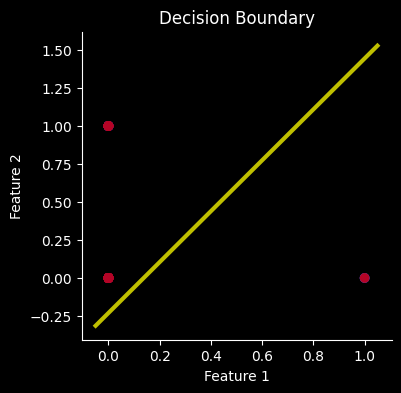

In [168]:
feat1=20
feat2=50

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,feat1], X[:, feat2], c=y, cmap='coolwarm')

xlim=ax.get_xlim()
x1 = np.linspace(xlim[0], xlim[1], 100)
x2 = ( - W[feat1] * x1 - b) / W[feat2]

ax.plot(x1, x2, c='y', lw=3)
ax.set_title("Decision Boundary")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

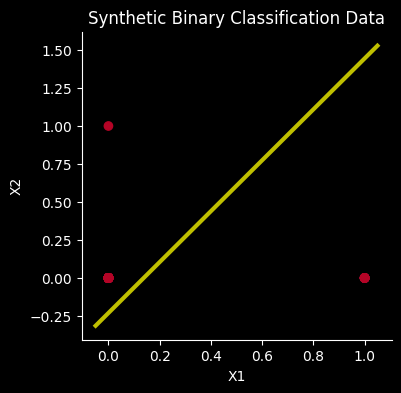

In [169]:

fig, ax = plt.figure(figsize=(4, 4)), plt.gca()
ax.scatter(X[:, 0], X[:, 18], c=y, cmap='coolwarm')
ax.plot(x1, x2, c='y', lw=3)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Synthetic Binary Classification Data")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim([-6,9])
# ax.set_ylim([-12,-2])
plt.show()

0.20392268040145792
0.9625582804428529


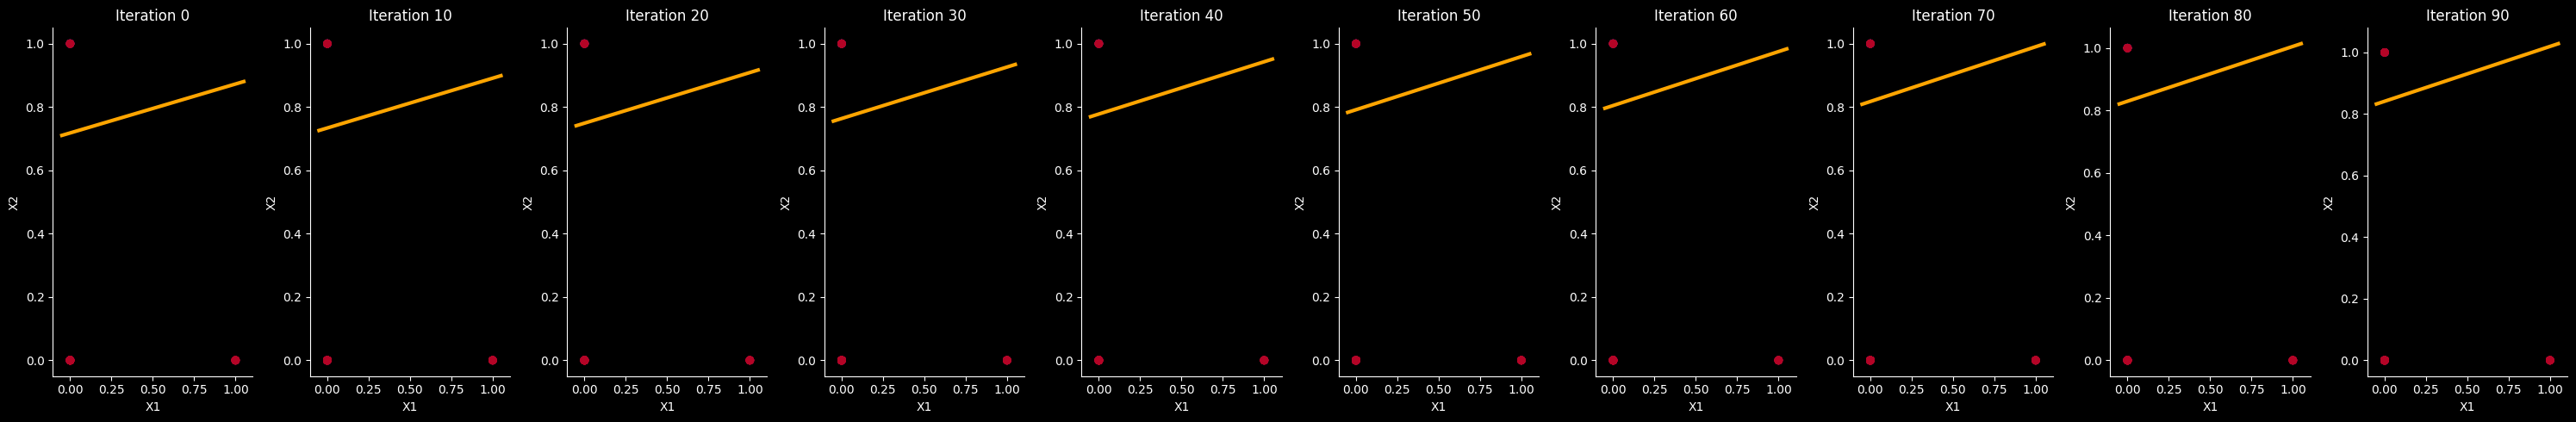

In [170]:
iter=100
print(Wall[iter][0][0])
print(ball[iter][0])

fig, ax = plt.subplots(1, 10, figsize=(30, 5))
for i in range(10):
    iter = i * 10
    ax[i].scatter(X[:,0], X[:, 1], c=y, cmap='coolwarm')
    x1 = np.linspace(xlim[0], xlim[1], 100)
    x2 = ( - Wall[iter][0][0] * x1 - ball[iter][0]) / Wall[iter][1][0]
    ax[i].plot(x1, x2, c='orange', lw=3)
    ax[i].set_title(f"Iteration {iter}")
    ax[i].set_xlabel("X1")
    ax[i].set_ylabel("X2")
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)



plt.tight_layout()

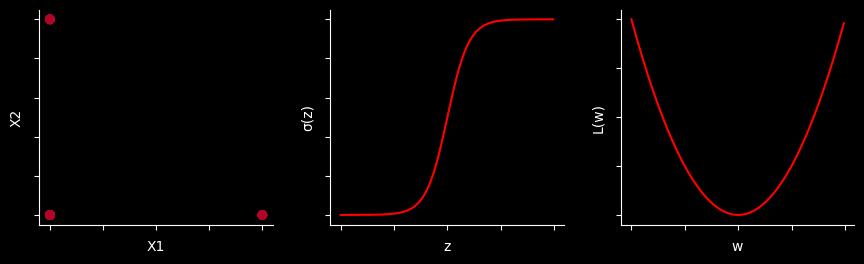

In [171]:

fig, axis = plt.subplots(1,3,figsize=(9,3))
ax=axis[0]
ax.scatter(X[:,0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])


x=np.arange(-10,10,0.1)
yy=2*x*x
x1=np.arange(-10,10,0.1)
y1=1/(1+np.exp(-x1))

ax=axis[1]
ax.plot(x1,y1,'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('z')
ax.set_ylabel('σ(z)')


ax=axis[2]
ax.plot(x,yy,'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('w')
ax.set_ylabel('L(w)')
plt.tight_layout(pad=2.0)





Accuracy: 0.88


<Axes: >

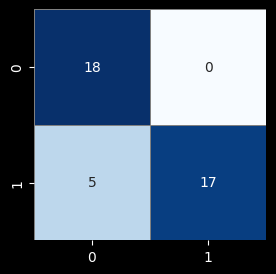

In [216]:
## MLP for N neurons and 2 classes
### using sklearn Perceptron

from sklearn.linear_model import Perceptron

Nneurons=np.shape(Unitpop)[1]

X=Unitpop[0:200,0:Nneurons+1]

y=StimTarget[0:200]-2 # to have labels 0,1,2,3 instead of 2,3,4,5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the Perceptron model
perceptron = Perceptron(random_state=15, max_iter=5000) # increase max_iter if not converged
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,linewidths=0.5, linecolor='gray')




In [219]:
## MLP for N neurons and 4 classes

Nneurons=np.shape(Unitpop)[1]

X=Unitpop[:,0:Nneurons]

y=StimTarget-2 # to have labels 0,1,2,3 instead of 2,3,4,5

AccScore_MLP=[]
CM_NN=np.zeros((4,4))
for split in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=split)

    model = Sequential()

    model.add(Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100,verbose=0)

    history = model.history.history
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    AccScore_MLP.append(accuracy_score(y_test, y_pred))

    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    accuracy = accuracy * 100
    print(f'Test accuracy: {accuracy:.2f}%')
    print(f'loss: {loss:.4f}')

    cm=confusion_matrix(y_test, y_pred)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6078 - loss: 1.6856 
Test accuracy: 63.75%
loss: 1.5699
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6938 - loss: 1.6037 
Test accuracy: 70.00%
loss: 1.4684
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7430 - loss: 0.6998  
Test accuracy: 71.25%
loss: 0.8300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6844 - loss: 1.4800 
Test accuracy: 65.00%
loss: 1.5167
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7180 - loss: 1.2843 
Test accuracy: 72.50%
loss: 1.2640
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6633 - loss: 1.6314 
Test accuracy: 66.25%
loss: 1.5524
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6438 - loss: 1.2697 
Test accuracy

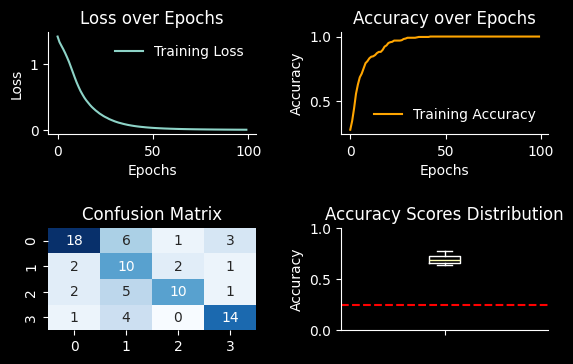

In [240]:

fig, ax = plt.subplots(2, 2, figsize=(6, 4))
ax[0, 0].plot(history['loss'], label='Training Loss')
ax[0, 0].set_title('Loss over Epochs')
ax[0, 0].set_xlabel('Epochs')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].legend(frameon=False)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 1].plot(history['accuracy'], label='Training Accuracy', color='orange')
ax[0, 1].set_title('Accuracy over Epochs')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend(frameon=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)

sns.heatmap(cm, cmap='Blues', ax=ax[1, 0],cbar=False, annot=True, fmt='d')
ax[1, 0].set_title('Confusion Matrix')

plt.tight_layout(pad=2.0)

ax[1,1].boxplot(AccScore_MLP)
ax[1,1].set_title('Accuracy Scores Distribution')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_ylim([0,1])
ax[1,1].set_ylabel('Accuracy')
ax[1,1].set_xticklabels([])

ax[1,1].axhline(0.25, color='r', ls='--', label='Threshold Accuracy')
plt.tight_layout(pad=2.0)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([3, 3, 3, 1, 1, 2, 1, 3, 3, 3, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1,
       3, 1, 3, 2, 3, 0, 3, 3, 0, 1, 2, 3, 3, 2, 2, 2, 0, 1, 0, 2, 3, 1,
       3, 1, 3, 0, 2, 1, 0, 3, 2, 1, 1, 3, 2, 1, 3, 3, 3, 3, 3, 2, 1, 1,
       1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 0, 3, 0])